# Carrier on-time performance for the state of New York, 2018
## by Yasir Gani

## Preliminary Wrangling

> My dataset contains details of all flights to and from the state of New York, in the year 2018. It contains details of the destinations for outbound flights, origins for inbound flights, as well as on-time performance data, including taxi time to and from the runway, total minutes delayed (or early) and reasons for delay (carrier, weather, NAS (National Air System), security and late aircraft), for major US carriers.

> I was inspired to choose this dataset because, well, I LOVE to fly! Hearing the deep hum of the engines as they speed up with the fuel injection is music to my ears. Add to that the taxiing to the runway and seeing a queue of planes ahead of us taking off while we prepare for our journey in the sky is the perfect start to my holiday. I need a window seat.

> This dataset was interesting to me because it contains information on taxi times to and from the runway, which I am very curious about. It would be great to know if taxi times are greater on average for certain carriers than others, or if it increases based on the departure airport. Knowing this information might just help me choose my next flight more wisely to get the best out of my journey!

> I obtained this through the recommendation of Udacity as a dataset to be used in this investigation. The data can be downloaded from https://www.transtats.bts.gov/Fields.asp.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import calendar

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#import the data into a dataframe

df = pd.read_csv('2018_on_time_new_york_2.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,...,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,1,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,1,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,1,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,1,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


In [3]:
#determine the number of rows, cols in dataset

df.shape

(754989, 25)

754,989 entries of data, with 25 columns containing variables.

In [4]:
#checking the datatypes for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
MONTH                  754989 non-null int64
DAY_OF_MONTH           754989 non-null int64
DAY_OF_WEEK            754989 non-null int64
FL_DATE                754989 non-null object
OP_UNIQUE_CARRIER      754989 non-null object
ORIGIN                 754989 non-null object
DEST                   754989 non-null object
DEP_TIME               731454 non-null float64
DEP_DELAY              729255 non-null float64
DEP_DEL15              729255 non-null float64
TAXI_OUT               730466 non-null float64
TAXI_IN                729904 non-null float64
ARR_TIME               729905 non-null float64
ARR_DELAY              726933 non-null float64
ARR_DEL15              726933 non-null float64
CANCELLED              754989 non-null int64
DIVERTED               754989 non-null int64
ACTUAL_ELAPSED_TIME    727925 non-null float64
AIR_TIME               727925 non-null float64
DISTANCE  

## Wrangling<br>

> From the data above, the following datatypes need to be changed:<br>
- month needs to be in category format to indicate Jan - Dec months
- day of week needs to indicate the day in category
- fl_date needs to be converted to datetime
- dep_time and arr_time are currently set to float values. I will convert this information to categorical data, into period of day
- delete duplicate rows

> Also the columns need to be made lowercase for ease of coding, and the fields carrier_delay, weather_delay, nas_delay, decurity_delay, late_aircraft_delay need to be unpivoted.

In [5]:
#lower-case the column names

df.columns = [x.lower() for x in df.columns]

In [6]:
df.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,1,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,1,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,1,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,1,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


In [7]:
#convert month numbers to calendar names
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
df.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,Jan,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,Jan,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,Jan,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,Jan,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,Jan,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


In [9]:
#convert months to category

df['month'] = df['month'].astype('category')

In [10]:
#convert fl_date to datetime

df['fl_date'] = pd.to_datetime(df['fl_date'])

In [11]:
#convert day numbers to day names
#create dictionary of day numbers to names

week = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}

In [12]:
#convert day numbers to names using dictionary

df['day_of_week'] = df['day_of_week'].replace(week)

In [13]:
#convert day names to category

df['day_of_week'] = df['day_of_week'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
month                  754989 non-null category
day_of_month           754989 non-null int64
day_of_week            754989 non-null category
fl_date                754989 non-null datetime64[ns]
op_unique_carrier      754989 non-null object
origin                 754989 non-null object
dest                   754989 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              754989 non-null int64
diverted               754989 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

In [15]:
#look for null values in dep_time in the dataset
df[df['dep_time'].isnull()]

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
294,Jan,6,Sat,2018-06-01,UA,ROC,EWR,NaN,NaN,NaN,...,1,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN
333,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
336,Jan,5,Fri,2018-05-01,UA,ROC,EWR,NaN,NaN,NaN,...,1,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN
339,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
342,Jan,5,Fri,2018-05-01,UA,EWR,ROC,NaN,NaN,NaN,...,1,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN
354,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
358,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
360,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
363,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
364,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN


The rows containing null values for dep_time also contain null values for the rest of the continuous data, but this is because the flights were cancelled, so cannot be removed from the dataset.

In [16]:
'''
#drop rows containing null values for dep_time

df = df.dropna(subset=['dep_time'])
'''

"\n#drop rows containing null values for dep_time\n\ndf = df.dropna(subset=['dep_time'])\n"

In [17]:
'''
df.info()
'''

'\ndf.info()\n'

In [18]:
'''
#convert the col to string to drop the last two (minutes) digits of the dep_time

df['dep_time'] = df['dep_time'].astype('str')
'''

"\n#convert the col to string to drop the last two (minutes) digits of the dep_time\n\ndf['dep_time'] = df['dep_time'].astype('str')\n"

In [19]:
'''
#drop the last two digits of time value - take 4 characters off to leave just the hour value

df['dep_time'] = df['dep_time'].str[:-4]
'''

"\n#drop the last two digits of time value - take 4 characters off to leave just the hour value\n\ndf['dep_time'] = df['dep_time'].str[:-4]\n"

In [20]:
'''
df['dep_time'].unique()
'''

"\ndf['dep_time'].unique()\n"

The '' and '24' values represent the hour 0, so need to be replaced.

In [21]:
'''
df['dep_time'] = df['dep_time'].replace(['','24'],'0')
'''

"\ndf['dep_time'] = df['dep_time'].replace(['','24'],'0')\n"

In [22]:
'''
df['dep_time'].unique()
'''

"\ndf['dep_time'].unique()\n"

In [23]:
'''
#convert the dep_time to integer

df['dep_time'] = df['dep_time'].astype('float')
'''

"\n#convert the dep_time to integer\n\ndf['dep_time'] = df['dep_time'].astype('float')\n"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
month                  754989 non-null category
day_of_month           754989 non-null int64
day_of_week            754989 non-null category
fl_date                754989 non-null datetime64[ns]
op_unique_carrier      754989 non-null object
origin                 754989 non-null object
dest                   754989 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              754989 non-null int64
diverted               754989 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

In [25]:
'''
#now to do the same with arr_time

df['arr_time'] = df['arr_time'].astype('str')

#drop the last two digits of time value - take 4 characters off to leave just the hour value

df['arr_time'] = df['arr_time'].str[:-4]

#replace '' and '24' values with '0'

df['arr_time'] = df['arr_time'].replace(['','24'],'0')
'''

"\n#now to do the same with arr_time\n\ndf['arr_time'] = df['arr_time'].astype('str')\n\n#drop the last two digits of time value - take 4 characters off to leave just the hour value\n\ndf['arr_time'] = df['arr_time'].str[:-4]\n\n#replace '' and '24' values with '0'\n\ndf['arr_time'] = df['arr_time'].replace(['','24'],'0')\n"

In [26]:
'''
df['arr_time'].unique()
'''

"\ndf['arr_time'].unique()\n"

In [27]:
'''
#convert the arr_time to integer

df['arr_time'] = df['arr_time'].astype('float')
'''

"\n#convert the arr_time to integer\n\ndf['arr_time'] = df['arr_time'].astype('float')\n"

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
month                  754989 non-null category
day_of_month           754989 non-null int64
day_of_week            754989 non-null category
fl_date                754989 non-null datetime64[ns]
op_unique_carrier      754989 non-null object
origin                 754989 non-null object
dest                   754989 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              754989 non-null int64
diverted               754989 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

In [29]:
#check for cuplicates
df[df.duplicated(keep=False)]

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
333,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
339,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
354,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
358,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
360,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
363,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
364,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
369,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
372,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
383,Jan,4,Thu,2018-04-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN


In [30]:
#drop the duplicate rows

df = df.drop_duplicates()

In [31]:
df.shape[0]

747356

The duplicate rows have now been eliminated from the dataframe.

In [32]:
#add period of day for departures to enhance categorical data analysis

def flight(time):
    if 0 <= time < 600:
        return 'Night'
    elif 600 <= time < 1200:
        return 'Morning'
    elif 1200 <= time < 1800:
        return 'Afternoon'
    elif 1800 <= time <= 2400:
        return 'Evening'
    else:
        return np.nan

In [33]:
df['dep_time'].max()

2400.0

In [34]:
df['dep_period'] = df['dep_time'].apply(flight)

In [35]:
df[df['dep_time'].isnull()]

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_period
294,Jan,6,Sat,2018-06-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
333,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
336,Jan,5,Fri,2018-05-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
342,Jan,5,Fri,2018-05-01,UA,EWR,ROC,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
354,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN,NaN
358,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN,NaN
380,Jan,4,Thu,2018-04-01,UA,BUF,EWR,NaN,NaN,NaN,...,0,NaN,NaN,282,NaN,NaN,NaN,NaN,NaN,NaN
383,Jan,4,Thu,2018-04-01,UA,LGA,IAH,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
384,Jan,4,Thu,2018-04-01,UA,IAH,LGA,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
386,Jan,4,Thu,2018-04-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#add period of day for arrivals to enhance categorical data analysis

df['arr_period'] = df['arr_time'].apply(flight)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747356 entries, 0 to 754988
Data columns (total 27 columns):
month                  747356 non-null category
day_of_month           747356 non-null int64
day_of_week            747356 non-null category
fl_date                747356 non-null datetime64[ns]
op_unique_carrier      747356 non-null object
origin                 747356 non-null object
dest                   747356 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              747356 non-null int64
diverted               747356 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

In [38]:
#create a second dataframe filtered for data containing minutes delay under different circumstances

df_delay = df[(df['carrier_delay'].notnull()) | (df['weather_delay'].notnull()) | (df['nas_delay'].notnull())
             | (df['security_delay'].notnull()) | (df['late_aircraft_delay'].notnull())]

In [39]:
df_delay.shape[0]

159333

In [40]:
#unpivot the data based on all columns, except the delay scenario times

df_delay = pd.melt(df_delay, id_vars=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance','dep_period','arr_period'], 
                   value_vars=['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'])

In [41]:
df_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,dep_period,arr_period,variable,value
0,Jan,27,Sat,2018-01-27,UA,LGA,ORD,1237.0,67.0,1.0,...,1.0,0,0,140.0,122.0,733,Afternoon,Afternoon,carrier_delay,44.0
1,Jan,26,Fri,2018-01-26,UA,ORD,LGA,1828.0,23.0,1.0,...,1.0,0,0,136.0,104.0,733,Evening,Evening,carrier_delay,23.0
2,Jan,26,Fri,2018-01-26,UA,EWR,ROC,2224.0,84.0,1.0,...,1.0,0,0,59.0,44.0,246,Evening,Evening,carrier_delay,56.0
3,Jan,25,Thu,2018-01-25,UA,LGA,IAH,1207.0,-3.0,0.0,...,1.0,0,0,274.0,211.0,1416,Afternoon,Afternoon,carrier_delay,0.0
4,Jan,25,Thu,2018-01-25,UA,LGA,ORD,1207.0,7.0,0.0,...,1.0,0,0,169.0,117.0,733,Afternoon,Afternoon,carrier_delay,7.0


In [42]:
df_delay.shape[0]

796665

In [43]:
#filter out delay time values that have a value of 0

df_delay_1 = df_delay[df_delay['value'] != 0]

In [44]:
df_delay_1.shape[0]

258138

In [45]:
'''
df_delay_2 = df_delay_1.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])
'''

"\ndf_delay_2 = df_delay_1.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',\n                                      'op_unique_carrier','origin','dest','dep_time',\n                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',\n                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',\n                                      'air_time','distance'])\n"

In [46]:
'''df_delay_2.shape[0]'''

'df_delay_2.shape[0]'

In [47]:
df_delay_1.shape[0]

258138

In [48]:
df_no_delay = df_delay = df[(df['carrier_delay'].isnull()) | (df['weather_delay'].isnull()) | (df['nas_delay'].isnull())
             | (df['security_delay'].isnull()) | (df['late_aircraft_delay'].isnull())]

In [49]:
df_no_delay.shape[0]

588023

In [50]:
'''159333+572120'''

'159333+572120'

In [51]:
df_no_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon
1,Jan,27,Sat,2018-01-27,UA,IAH,LGA,1837.0,-10.0,0.0,...,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN,Evening,Evening
2,Jan,27,Sat,2018-01-27,UA,EWR,ROC,2059.0,-10.0,0.0,...,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN,Evening,Evening
3,Jan,27,Sat,2018-01-27,UA,DEN,LGA,1011.0,-9.0,0.0,...,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon
5,Jan,26,Fri,2018-01-26,UA,ORD,LGA,2048.0,-15.0,0.0,...,125.0,96.0,733,NaN,NaN,NaN,NaN,NaN,Evening,Evening


In [52]:
df_no_delay.drop(columns=['nas_delay','security_delay','late_aircraft_delay'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
df_no_delay.rename(columns={'carrier_delay': 'delay_type', 'weather_delay': 'delay_type_mins'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [54]:
df_no_delay.head(1)

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,delay_type,delay_type_mins,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,0.0,0,0,191.0,176.0,1620,NaN,NaN,Morning,Afternoon


In [55]:
df_delay_1.rename(columns={'variable': 'delay_type', 'value': 'delay_type_mins'}, inplace=True)

In [56]:
df_delay_1.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,dep_period,arr_period,delay_type,delay_type_mins
0,Jan,27,Sat,2018-01-27,UA,LGA,ORD,1237.0,67.0,1.0,...,1.0,0,0,140.0,122.0,733,Afternoon,Afternoon,carrier_delay,44.0
1,Jan,26,Fri,2018-01-26,UA,ORD,LGA,1828.0,23.0,1.0,...,1.0,0,0,136.0,104.0,733,Evening,Evening,carrier_delay,23.0
2,Jan,26,Fri,2018-01-26,UA,EWR,ROC,2224.0,84.0,1.0,...,1.0,0,0,59.0,44.0,246,Evening,Evening,carrier_delay,56.0
4,Jan,25,Thu,2018-01-25,UA,LGA,ORD,1207.0,7.0,0.0,...,1.0,0,0,169.0,117.0,733,Afternoon,Afternoon,carrier_delay,7.0
6,Jan,24,Wed,2018-01-24,UA,IAH,LGA,1935.0,55.0,1.0,...,1.0,0,0,176.0,153.0,1416,Evening,Evening,carrier_delay,8.0


In [57]:
df_no_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,delay_type,delay_type_mins,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,0.0,0,0,191.0,176.0,1620,NaN,NaN,Morning,Afternoon
1,Jan,27,Sat,2018-01-27,UA,IAH,LGA,1837.0,-10.0,0.0,...,0.0,0,0,183.0,157.0,1416,NaN,NaN,Evening,Evening
2,Jan,27,Sat,2018-01-27,UA,EWR,ROC,2059.0,-10.0,0.0,...,0.0,0,0,68.0,47.0,246,NaN,NaN,Evening,Evening
3,Jan,27,Sat,2018-01-27,UA,DEN,LGA,1011.0,-9.0,0.0,...,0.0,0,0,194.0,174.0,1620,NaN,NaN,Morning,Afternoon
5,Jan,26,Fri,2018-01-26,UA,ORD,LGA,2048.0,-15.0,0.0,...,0.0,0,0,125.0,96.0,733,NaN,NaN,Evening,Evening


In [121]:
df_master = pd.concat([df_delay_1,df_no_delay])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [122]:
df_master.shape[0]

846161

In [123]:
'''df_master['is_duplicated'] = df.duplicated(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])
'''

"df_master['is_duplicated'] = df.duplicated(subset=['month','day_of_month','day_of_week','fl_date',\n                                      'op_unique_carrier','origin','dest','dep_time',\n                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',\n                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',\n                                      'air_time','distance'])\n"

At the moment df_master has 846161 rows, whereas df had 731453 before the delay scenario times was unpivoted. This is because some flights had more than one cause of delay, so they appear twice in df_master, but with different delay scenario times.

In [124]:
#checking that dropping duplicates on all columns except delay scenario and delay scenario times produces the same amount
#of rows as df before data was unpivoted

df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance']).shape[0]

747356

In [125]:
'''
#convert dep period and arrival periods to category type

df['dep_period'] = df['dep_period'].astype('category')
df['arr_period'] = df['arr_period'].astype('category')
'''

"\n#convert dep period and arrival periods to category type\n\ndf['dep_period'] = df['dep_period'].astype('category')\ndf['arr_period'] = df['arr_period'].astype('category')\n"

In [126]:
#write df_master to csv so that it can be easily loaded for the slide deck notebook

df_master.to_csv('df_master.csv')

In [127]:
df_master.head()

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
0,140.0,122.0,1.0,44.0,Afternoon,1357.0,0,27,Sat,carrier_delay,...,1237.0,ORD,733,0,2018-01-27,Jan,UA,LGA,2.0,16.0
1,136.0,104.0,1.0,24.0,Evening,2144.0,0,26,Fri,carrier_delay,...,1828.0,LGA,733,0,2018-01-26,Jan,UA,ORD,4.0,28.0
2,59.0,44.0,1.0,64.0,Evening,2323.0,0,26,Fri,carrier_delay,...,2224.0,ROC,246,0,2018-01-26,Jan,UA,EWR,6.0,9.0
4,169.0,117.0,1.0,15.0,Afternoon,1356.0,0,25,Thu,carrier_delay,...,1207.0,ORD,733,0,2018-01-25,Jan,UA,LGA,3.0,49.0
6,176.0,153.0,1.0,20.0,Evening,2331.0,0,24,Wed,carrier_delay,...,1935.0,LGA,1416,0,2018-01-24,Jan,UA,IAH,3.0,20.0


In [128]:
df_master.describe()

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_time,cancelled,day_of_month,delay_type_mins,dep_del15,dep_delay,dep_time,distance,diverted,taxi_in,taxi_out
count,826730.000000,826730.000000,825738.000000,825738.000000,828710.000000,846161.000000,846161.000000,258138.000000,828060.000000,828060.000000,830259.000000,846161.000000,846161.000000,828709.000000,829271.000000
mean,155.482021,124.304444,0.312615,15.350660,1483.059839,0.020062,15.765864,44.819542,0.289428,20.596383,1360.508204,876.419385,0.002900,8.420110,22.769842
std,81.231026,78.939471,0.463559,65.559398,562.866107,0.140214,8.718487,69.171164,0.453497,61.673637,504.793427,656.454365,0.053775,7.003699,14.293013
min,33.000000,18.000000,0.000000,-104.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-49.000000,1.000000,94.000000,0.000000,1.000000,1.000000
25%,97.000000,66.000000,0.000000,-17.000000,1059.000000,0.000000,8.000000,12.000000,0.000000,-5.000000,936.000000,395.000000,0.000000,5.000000,14.000000
50%,136.000000,104.000000,0.000000,-4.000000,1527.000000,0.000000,16.000000,24.000000,0.000000,-1.000000,1355.000000,733.000000,0.000000,7.000000,19.000000
75%,182.000000,149.000000,1.000000,24.000000,1938.000000,0.000000,23.000000,52.000000,1.000000,21.000000,1758.000000,1076.000000,0.000000,10.000000,27.000000
max,744.000000,696.000000,1.000000,2692.000000,2400.000000,1.000000,31.000000,2692.000000,1.000000,2710.000000,2400.000000,4983.000000,1.000000,258.000000,178.000000


In [129]:
#filter for flights that were not cancelled

df_master = df_master[df_master['cancelled'] == 0]

In [130]:
#filter out columns of data where there are null values, except in the case of delay_type and delay_type_mins

df_master = df_master.dropna(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

In [131]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823655 entries, 0 to 754988
Data columns (total 24 columns):
actual_elapsed_time    823655 non-null float64
air_time               823655 non-null float64
arr_del15              823655 non-null float64
arr_delay              823655 non-null float64
arr_period             823655 non-null object
arr_time               823655 non-null float64
cancelled              823655 non-null int64
day_of_month           823655 non-null int64
day_of_week            823655 non-null category
delay_type             257980 non-null object
delay_type_mins        257980 non-null float64
dep_del15              823655 non-null float64
dep_delay              823655 non-null float64
dep_period             823655 non-null object
dep_time               823655 non-null float64
dest                   823655 non-null object
distance               823655 non-null int64
diverted               823655 non-null int64
fl_date                823655 non-null datetime64[ns]


In [137]:
#remove duplicate instances of flights (which were previously there because of multiple types of delays)

df_master_unique = df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

In [142]:
df_master_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724850 entries, 0 to 754988
Data columns (total 24 columns):
actual_elapsed_time    724850 non-null float64
air_time               724850 non-null float64
arr_del15              724850 non-null float64
arr_delay              724850 non-null float64
arr_period             724850 non-null object
arr_time               724850 non-null float64
cancelled              724850 non-null int64
day_of_month           724850 non-null int64
day_of_week            724850 non-null category
delay_type             159175 non-null object
delay_type_mins        159175 non-null float64
dep_del15              724850 non-null float64
dep_delay              724850 non-null float64
dep_period             724850 non-null object
dep_time               724850 non-null float64
dest                   724850 non-null object
distance               724850 non-null int64
diverted               724850 non-null int64
fl_date                724850 non-null datetime64[ns]


In [138]:
df_master['op_unique_carrier'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [139]:
df_master['origin'].unique()

array(['LGA', 'ORD', 'EWR', 'IAH', 'DEN', 'BUF', 'ALB', 'PDX', 'JFK',
       'IND', 'RDU', 'JAX', 'RSW', 'SYR', 'MSY', 'BNA', 'CLE', 'MCI',
       'ORF', 'PIT', 'CVG', 'DTW', 'DCA', 'ELM', 'ROC', 'BTV', 'IAD',
       'SAV', 'HPN', 'BOS', 'DFW', 'CLT', 'DAY', 'TYS', 'MSN', 'RIC',
       'CMH', 'PWM', 'BGR', 'CHS', 'BWI', 'MSP', 'CAE', 'CHO', 'TPA',
       'SRQ', 'STL', 'MCO', 'SAN', 'FLL', 'PBI', 'LAX', 'SWF', 'DAB',
       'SFO', 'LAS', 'BQN', 'AUS', 'SJU', 'PSP', 'SMF', 'SEA', 'SJC',
       'PHX', 'HOU', 'SLC', 'BUR', 'LGB', 'RNO', 'OAK', 'BHM', 'MEM',
       'GSO', 'ATL', 'GRR', 'XNA', 'MDT', 'OMA', 'LEX', 'ISP', 'MIA',
       'SFB', 'PBG', 'PGD', 'PIE', 'IAG', 'HNL', 'ILM', 'SDF', 'PHL',
       'CAK', 'BGM', 'ITH', 'DAL', 'MDW', 'MKE', 'EGE', 'SAT', 'PSE',
       'ABQ', 'OGS', 'ROA', 'MYR', 'MTJ', 'MHT', 'DSM', 'GSP', 'AGS',
       'ERI', 'STT', 'ACK', 'ORH', 'MVY', 'HYA', 'CHA', 'BZN', 'TVC',
       'ONT', 'SNA', 'JAC', 'ART', 'AVL', 'SBN'], dtype=object)

In [140]:
df_master['delay_type'].unique()

array(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', nan], dtype=object)

### What is the structure of your dataset?

> The dataset contains 823,655 rows of data, containing 724,850 civil aviation flights flown in and out of New York state in 2018. The data contains 24 different variables, most of which are numeric. The air_time, arr_delay, delay_type_mins, dep_delay, taxi_in and taxi_out are all measured in minutes, whereas the arr_time and dep_time are grouped into each hour of the day. The day_of_week, month, arr_period and dep_period are all categorical values that are ordinal in that they have a specific order: days of the week, months of the year, and periods of day(morning, afternoon, evening, night).<br>

> The period of day is split into groups of six hours:<br>
- midnight to 6am: **night**
- 6am to 12pm: **morning**
- 12pm to 6pm: **afternoon**
- 6pm to midnight: **evening**

> Distance is covered in kilometers. Carriers are denoted by a unique combination of two letters, whereas airports are denoted by a unique combination of three letters.

### What is/are the main feature(s) of interest in your dataset?

> I am particularly interested in which type of delay is causes the largest delay in time, as well as whether carrier, airports or delay types cause the longest taxi times to and from the the runway.

> I want to determine which carrier, airport and period of day was the worst to fly, and which was the best to fy in terms of delays.

> I want to determine which carrier and airport will give me the longest taxi time without a delay too.

> I want to investigate this dataset from the perspective of the passenger, and the time-delay they incur in their journeys, rather than the aircraft/route itself.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect weather delays to have the biggest impact on flight times, while  believe taxi times could be affected by nas_delays (delays within the control of the National Airspace System). I also expect New York's JFK to have the longest taxi time without any specific delay type, simply due to the large and busy nature of the airport.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will begin by investigating just how many flights took place at each period of day.

In [143]:
df_master_unique.shape[0]

724850

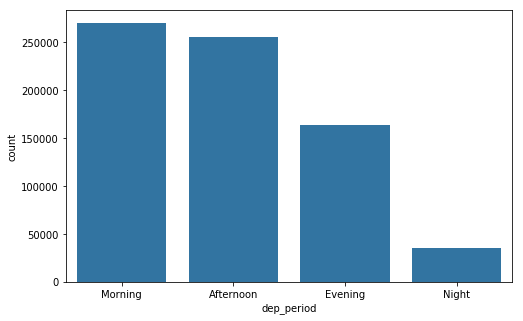

In [144]:
#plot countplot for categorical data

plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
time_period = ['Morning', 'Afternoon', 'Evening', 'Night']
sb.countplot(data = df_master_unique, x = 'dep_period', color=color, order=time_period);

Clearly the busiest time in US airspace was in the morning or afternoon with over 250,000 flights each, between 6am and 6pm, with very little flights in the small hours. Evening time was less busy but still significant with over 150,000 flights operating.

Next, let's take a look at the number of flights per carrier:

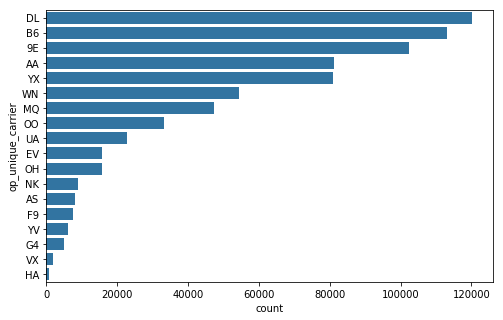

In [145]:
#plot countplot of carriers
plt.figure(figsize=[8,5])

#order bars by frequency
type_counts = df_master_unique['op_unique_carrier'].value_counts().index
sb.countplot(data = df_master_unique, y = 'op_unique_carrier', color=color, order=type_counts);

Delta Airlines had the most number of domestic flights operating in and out of NY, closely followed by JetBlue and Endeavour Air. These three had by far the most amount of flights, after which American Airlines and Republic Airline. I did not expect to see United Airlines so far down the order with the number of domestic flights. However this may be down to the codeshare agreements between airlines, resulting in some United customers flying on aircraft desiganated as other carriers.

Let's look closer at the proportion of flights operated by the top 5 carriers:

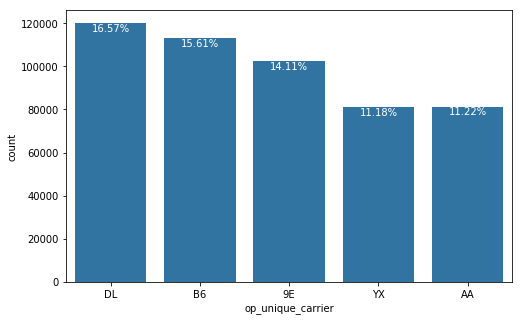

In [147]:
#plot relative frequency graph of carriers
plt.figure(figsize=[8,5])
carriers = ['DL','B6','9E','YX','AA']
sb.countplot(data = df_master_unique, x = 'op_unique_carrier', color = color, order=carriers)

# add annotations
n_points = df_master_unique.shape[0]
cat_counts = df_master_unique['op_unique_carrier'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w')

Delta accounted for over 16% of the flights in and out of NY in 2018. Which is significant given there were 18 carriers in the dataset.

Which airport was the busiest for departures and arrivals? I expect JFK to be followed by LGA, but further investigation will prove whether my predictions are correct:

In [148]:
#start by filtering for airports in NY only

ny = ['JFK','BUF','ALB','HPN','LGA','ROC','SYR','ELM','ISP','ITH']

In [149]:
ny_dep = df_master_unique[df_master_unique['origin'].isin(ny)]
ny_arr = df_master_unique[df_master_unique['dest'].isin(ny)]

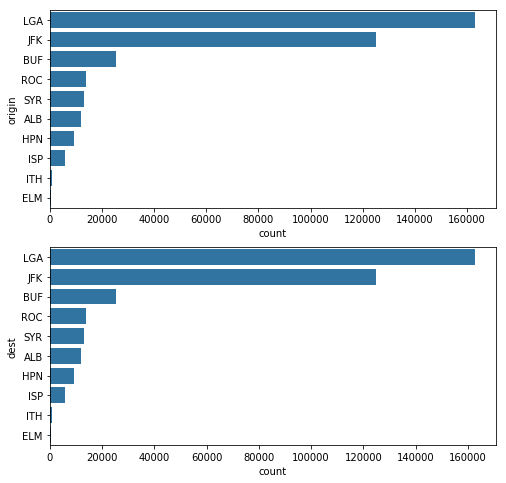

In [150]:
#plot the countplots for each airport for departures and arrivals

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
airports_dep = ny_dep['origin'].value_counts().index
airports_arr = ny_arr['dest'].value_counts().index

sb.countplot(data = ny_dep, y = 'origin', color=color, order=airports_dep, ax=ax[0])
sb.countplot(data = ny_arr, y = 'dest', color=color, order=airports_arr, ax=ax[1]);

I did not expect that! LGA has many more departures and arrivals than JFK! Perhaps this is because they are classed as more of a regional airport than JFK, what with the vast number of international flights that operate in and out of JFK daily.<br>
<br>
In third place lies BUF, which handles far fewer flights than the msin two, but still significnantly more than the rest of the airports in NY.<br>
<br>
A picture is beginning to develop of the air traffic around each airport. Based on my analysis so far, I may be wrong in assuming JFK will have the longest taxi times.

In [151]:
#checking how many flights in and out of NY there were in 2018, and checking the difference
ny_dep.shape[0] - ny_arr.shape[0]

476

Looking at the comparison above of departures and arrivals, the pattern of the counts is very similar. This will be because, every flight that lands into NY, will still leave NY a few hours later, so the expectation would be that the number of departures and arrivals are very close, as proven with a difference of 53 flights.

Now to consider how flights are distributed across the different months and days of the week.

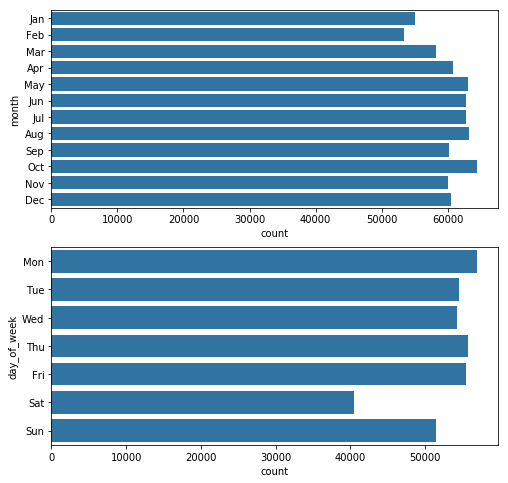

In [152]:
#plot the countplots of total flights for each month and each day of the week

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

sb.countplot(data = df_master_unique, y = 'month', color=color, order=months, ax=ax[0])
sb.countplot(data = ny_arr, y = 'day_of_week', color=color, order=days, ax=ax[1]);

Interestingly, the least air traffic was noted on Saturdays. This would go against my expectations as I have always thought the weekend to have the largest movement due to weekend getaways. However this is better explained by the Thursdays and Fridays having almost the highest movement. Perhaps by Saturday people have already made their journeys for their weekend getaways. Mondays were the busiest, This may be explained by business travellers.<br>
<br>
October was the busiest month for air traffic, followed by summer months, which could be high due to the summer holidays.<br>
<br>
This data would point me in the direction of expecting the largest number of delays in October or the summer months, with particular focus on Mondays, Thursdays and Fridays.

How many flights were delayed in 2018:

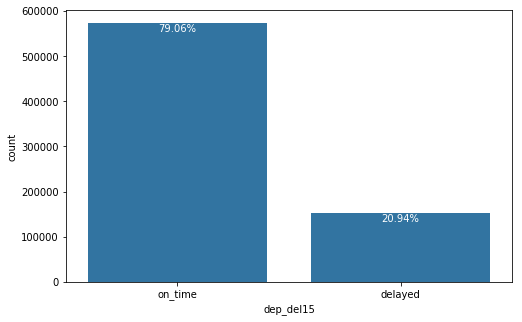

In [153]:
#plot countplot of delayed aircraft departures
plt.figure(figsize = [8,5])

ax = sb.countplot(data = df_master_unique, x = 'dep_del15', color=color)

total = float(df_master_unique.shape[0])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:0.2f}%'.format(100*height/total),va='top',ha='center', color='w') 
plt.xticks(np.arange(2), ('on_time', 'delayed'));

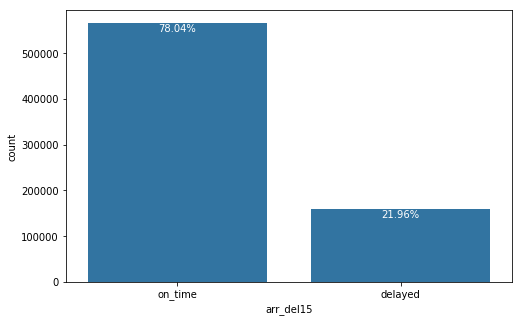

In [154]:
#plot countplot of delayed aircraft arrivals
plt.figure(figsize = [8,5])

ax = sb.countplot(data = df_master_unique, x = 'arr_del15', color=color)

total = float(df_master_unique.shape[0])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:0.2f}%'.format(100*height/total),va='top',ha='center', color='w') 
plt.xticks(np.arange(2), ('on_time', 'delayed'));

The proportions of departures and arrivals that were on time or delayed were very similar. However, departures out of NY seemed to be slightly better than arrivals into NY, with an on_time rate of 79% versus 78% respectively.

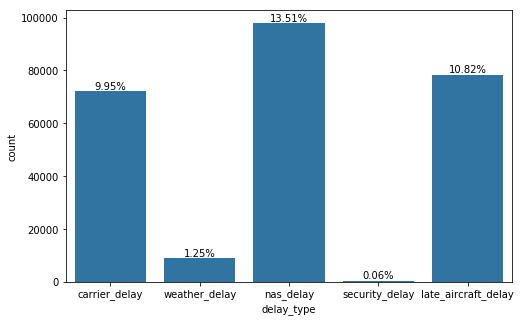

In [155]:
#plot relative frequency graph of delay types
plt.figure(figsize=[8,5])
carriers = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']
sb.countplot(data = df_master, x = 'delay_type', color = color, order=carriers)

# add annotations
n_points = df_master_unique.shape[0]
cat_counts = df_master['delay_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='bottom');

Clearly the biggest delay type was nas_delay with 14%, followed by late_aircraft with 11%. Interestingly weather had very little cause in the noted delays, while security delays were extremely low.

How do the delay times vary? If the delay time in dep_delay or arr_delay is 0 or less, then it was on time or early. If greater than 0, it was late.

In [156]:
df_master_unique.describe()

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_time,cancelled,day_of_month,delay_type_mins,dep_del15,dep_delay,dep_time,distance,diverted,taxi_in,taxi_out
count,724850.000000,724850.000000,724850.000000,724850.000000,724850.000000,724850.0,724850.000000,159175.000000,724850.000000,724850.000000,724850.000000,724850.000000,724850.0,724850.000000,724850.000000
mean,154.589481,124.580578,0.219597,6.137219,1469.927175,0.0,15.877841,48.272166,0.209435,12.946308,1329.152019,886.098064,0.0,8.254122,21.754781
std,81.853691,79.703653,0.413974,55.195389,544.657978,0.0,8.747026,77.113555,0.406906,51.746815,500.114757,666.028913,0.0,6.590543,13.021970
min,33.000000,18.000000,0.000000,-104.000000,1.000000,0.0,1.000000,1.000000,0.000000,-49.000000,1.000000,94.000000,0.0,1.000000,1.000000
25%,96.000000,65.000000,0.000000,-19.000000,1051.000000,0.0,8.000000,14.000000,0.000000,-6.000000,914.000000,395.000000,0.0,5.000000,13.000000
50%,135.000000,104.000000,0.000000,-8.000000,1504.000000,0.0,16.000000,25.000000,0.000000,-3.000000,1324.000000,733.000000,0.0,7.000000,18.000000
75%,180.000000,149.000000,0.000000,10.000000,1919.000000,0.0,23.000000,54.000000,0.000000,9.000000,1736.000000,1080.000000,0.0,10.000000,26.000000
max,744.000000,696.000000,1.000000,2692.000000,2400.000000,0.0,31.000000,2692.000000,1.000000,2710.000000,2400.000000,4983.000000,0.0,258.000000,178.000000


Looking at departures first.

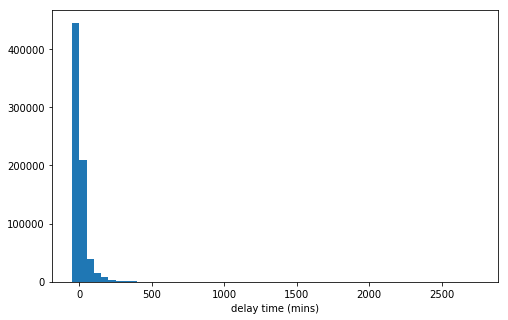

In [157]:
# start with a standard histogram
binsize = 50
bins = np.arange(-50, df_master_unique['dep_delay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'dep_delay', bins = bins)
plt.xlabel('delay time (mins)')
plt.show();

There is clearly a long tail in the histogram, indicating some possible outliers at the higher end of the departure delays. Also most flights were in the distribution below 0 (on time) so we can look at this on a log scale:

Let's look at the outliers for departures that were delayed more than 24 hours:

In [158]:
#departures delayed by more than 1,440 minutes (24 hours)
df_master[df_master['dep_delay'] > 1440]

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2419,219.0,194.0,1.0,1473.0,Morning,932.0,0,6,Sat,carrier_delay,...,653.0,JFK,1576,0,2018-06-01,Jan,B6,BQN,6.0,19.0
5382,600.0,558.0,1.0,1717.0,Morning,1132.0,0,3,Wed,carrier_delay,...,2032.0,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
10477,268.0,244.0,1.0,2023.0,Night,115.0,0,11,Thu,carrier_delay,...,1847.0,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
36760,133.0,62.0,1.0,1685.0,Evening,2245.0,0,27,Fri,carrier_delay,...,2032.0,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
145047,246.0,200.0,1.0,1505.0,Afternoon,1611.0,0,18,Sun,carrier_delay,...,1205.0,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0
164715,600.0,558.0,1.0,1717.0,Morning,1132.0,0,3,Wed,weather_delay,...,2032.0,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
250804,108.0,79.0,1.0,2692.0,Morning,1021.0,0,5,Thu,weather_delay,...,833.0,JFK,541,0,2018-05-07,Jul,OO,CLT,12.0,17.0
329143,268.0,244.0,1.0,2023.0,Night,115.0,0,11,Thu,nas_delay,...,1847.0,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
355426,133.0,62.0,1.0,1685.0,Evening,2245.0,0,27,Fri,nas_delay,...,2032.0,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
463713,246.0,200.0,1.0,1505.0,Afternoon,1611.0,0,18,Sun,nas_delay,...,1205.0,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0


In [159]:
#departures delayed by more than 1,440 minutes (24 hours)
df_master[df_master['arr_delay'] > 1440]

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2419,219.0,194.0,1.0,1473.0,Morning,932.0,0,6,Sat,carrier_delay,...,653.0,JFK,1576,0,2018-06-01,Jan,B6,BQN,6.0,19.0
5382,600.0,558.0,1.0,1717.0,Morning,1132.0,0,3,Wed,carrier_delay,...,2032.0,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
10477,268.0,244.0,1.0,2023.0,Night,115.0,0,11,Thu,carrier_delay,...,1847.0,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
36760,133.0,62.0,1.0,1685.0,Evening,2245.0,0,27,Fri,carrier_delay,...,2032.0,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
123483,119.0,72.0,1.0,1443.0,Afternoon,1451.0,0,9,Tue,carrier_delay,...,1252.0,LGA,419,0,2018-09-10,Oct,EV,CLE,20.0,27.0
145047,246.0,200.0,1.0,1505.0,Afternoon,1611.0,0,18,Sun,carrier_delay,...,1205.0,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0
164715,600.0,558.0,1.0,1717.0,Morning,1132.0,0,3,Wed,weather_delay,...,2032.0,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
250804,108.0,79.0,1.0,2692.0,Morning,1021.0,0,5,Thu,weather_delay,...,833.0,JFK,541,0,2018-05-07,Jul,OO,CLT,12.0,17.0
329143,268.0,244.0,1.0,2023.0,Night,115.0,0,11,Thu,nas_delay,...,1847.0,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
355426,133.0,62.0,1.0,1685.0,Evening,2245.0,0,27,Fri,nas_delay,...,2032.0,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0


For consistent data, I will trim any data that contains delays of over 24 hours.

In [160]:
#filter the master dataset

df_master = df_master[(df_master['dep_delay'] <= 1440) | (df_master['arr_delay'] <= 1440)]

In [161]:
#remove duplicate instances of flights (which were previously there because of multiple types of delays)

df_master_unique = df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

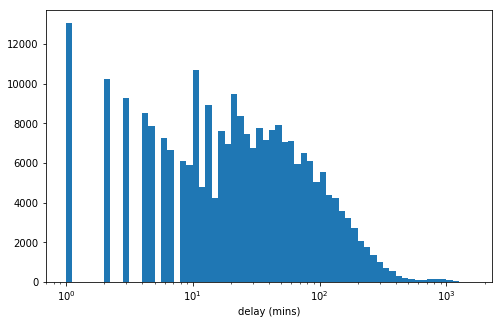

In [162]:
#plotting on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_master_unique['dep_delay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'dep_delay', bins = bins)
plt.xscale('log')
plt.xlabel('delay (mins)')
plt.show()

Looking at the histogram on a log scale you can see the peak for on time performance still remains, and it begins a smooth ramp down to the delayed times, indicating a large number of flights departing before the specified time. In addition there is another peak between 10 and 100 mins delay showing that, when flights depart after the time specified, it is usually within this time range. The smooth tapering off of the histogram at the longer delay end would indicate fewer and fewer flights departing later.<br>
<br>
The number of flights departing before time is interesting to note because, I have never noticed if my flight left the gate before time or not. Note, that in this case, departure means leaving the boarding gate!

Looking at arrivals.

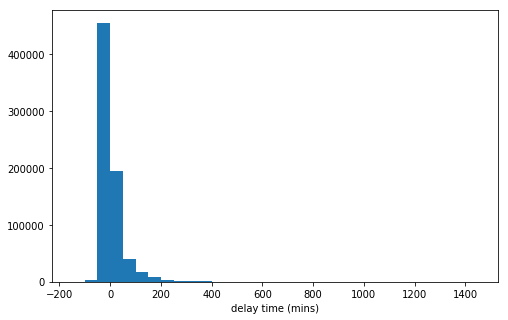

In [163]:
# start with a standard histogram
binsize = 50
bins = np.arange(-150, df_master_unique['arr_delay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'arr_delay', bins = bins)
plt.xlabel('delay time (mins)')
plt.show();

This is looking the same as the departure delays histogram. Plotting this data on a log scale histogram:

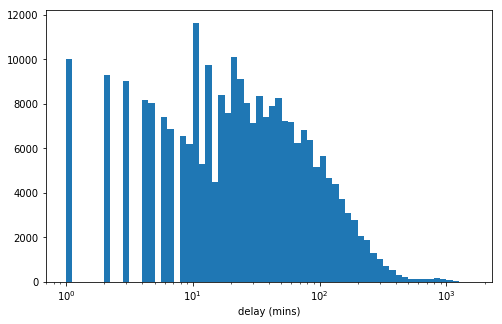

In [164]:
#plotting on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_master_unique['arr_delay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'arr_delay', bins = bins)
plt.xscale('log')
plt.xlabel('delay (mins)')
plt.show()

The pattern of the arrivals delay histogram is very similar to that of departures. However, for early arrivals, the count seems a little smaller, and the closer the arrivals time approches (for early arrivals) the number of flights decreases more and more. There are two peaks in this histogram, one for the early flights and one for arrivals between 10 and 100 mins late. In the delay phase it looks one main peak tapering off with a fairly long tail indicating most flights have short to moderate delays, with very few having extremely long delays in arrivals.

One of the key points of my investigation is to determine the factors affecting the taxi time to and from the runway. Therefore let's look at the distribution of taxi times:

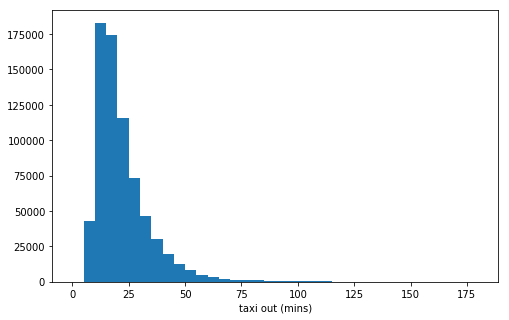

In [165]:
#taxi time to the runway (taxi_out)
#histogram to plot taxi out

binsize = 5
bins = np.arange(0, df_master_unique['taxi_out'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'taxi_out', bins = bins)
plt.xlabel('taxi out (mins)')
plt.show();

We can see another similar pattern as that of departure/arrival delays, with the curve being right-skewed. Most of the taxi times fall in a short range, up to 25 minutes. However the long x-axis here would indicate some exceptionally high values in the data, some outliers. These could be removed.

Let's look at the taxi in times now:

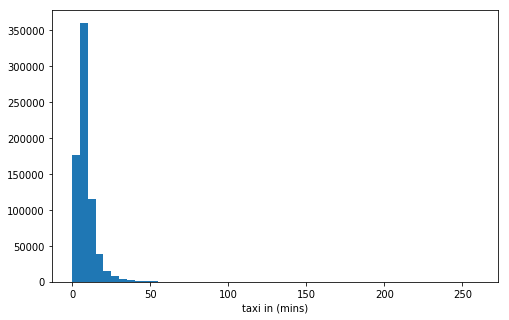

In [166]:
#taxi time from the runway (taxi_in)
#histogram to plot taxi in

binsize = 5
bins = np.arange(0, df_master_unique['taxi_in'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'taxi_in', bins = bins)
plt.xlabel('taxi in (mins)')
plt.show();

Yet again the same pattern emerges, with the data being skewed to the right. This graph also suggests some outliers as almost all the data is to the left side of the x-axis. This would suggest some possible outliers in the data. It would be interesting to investigate this further, as generally flights arriving would not be expected to wait on the tarmac for such a long time without a gate being made available.

In [167]:
#investigate outliers in taxi_out

taxi_out_outliers = taxi_out[taxi_out['taxi_out'] > 125]
taxi_out_outliers

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2199,199.0,56.0,1.0,339.0,Evening,1901.0,0,5,Fri,carrier_delay,...,1542.0,ROC,264,0,2018-05-01,Jan,B6,JFK,4.0,139.0
2296,285.0,147.0,1.0,285.0,Afternoon,1504.0,0,5,Fri,carrier_delay,...,1019.0,MCO,944,0,2018-05-01,Jan,B6,JFK,11.0,127.0
2306,201.0,59.0,1.0,232.0,Evening,2020.0,0,5,Fri,carrier_delay,...,1659.0,BUF,301,0,2018-05-01,Jan,B6,JFK,3.0,139.0
2355,189.0,46.0,1.0,161.0,Afternoon,1322.0,0,6,Sat,carrier_delay,...,1013.0,JFK,209,0,2018-06-01,Jan,B6,SYR,4.0,139.0
4032,186.0,41.0,1.0,126.0,Morning,1014.0,0,30,Tue,carrier_delay,...,708.0,LGA,184,0,2018-01-30,Jan,B6,BOS,5.0,140.0
5086,235.0,80.0,1.0,106.0,Morning,1155.0,0,30,Tue,carrier_delay,...,800.0,CLT,544,0,2018-01-30,Jan,EV,LGA,14.0,141.0
10897,501.0,344.0,1.0,220.0,Evening,2100.0,0,5,Fri,carrier_delay,...,1539.0,LAX,2475,0,2018-05-01,Jan,DL,JFK,9.0,148.0
15183,205.0,61.0,1.0,185.0,Afternoon,1451.0,0,7,Wed,carrier_delay,...,1126.0,LGA,431,0,2018-07-02,Feb,EV,RDU,13.0,131.0
23663,230.0,89.0,1.0,126.0,Afternoon,1310.0,0,2,Fri,carrier_delay,...,920.0,CVG,585,0,2018-02-03,Mar,9E,LGA,4.0,137.0
24216,248.0,113.0,1.0,191.0,Morning,1138.0,0,2,Fri,carrier_delay,...,830.0,ORD,740,0,2018-02-03,Mar,9E,JFK,9.0,126.0


In [168]:
taxi_out_outliers.sample(10)

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
366007,231.0,83.0,1.0,116.0,Afternoon,1356.0,0,4,Wed,nas_delay,...,1005.0,LGA,502,0,2018-04-04,Apr,DL,DTW,10.0,138.0
373362,337.0,190.0,1.0,134.0,Evening,2120.0,0,15,Tue,nas_delay,...,1643.0,DFW,1389,0,2018-05-15,May,AA,LGA,7.0,140.0
434114,248.0,81.0,1.0,93.0,Evening,2330.0,0,7,Fri,nas_delay,...,1922.0,CLT,541,0,2018-07-09,Sep,9E,JFK,4.0,163.0
417232,350.0,187.0,1.0,104.0,Evening,1918.0,0,2,Thu,nas_delay,...,1428.0,DFW,1389,0,2018-02-08,Aug,AA,LGA,24.0,139.0
405869,374.0,203.0,1.0,160.0,Afternoon,1446.0,0,15,Sun,nas_delay,...,832.0,BQN,1576,0,2018-07-15,Jul,B6,JFK,6.0,165.0
327229,194.0,51.0,1.0,101.0,Afternoon,1311.0,0,12,Fri,nas_delay,...,957.0,DCA,214,0,2018-12-01,Jan,YX,LGA,4.0,139.0
421072,362.0,199.0,1.0,112.0,Evening,1951.0,0,2,Thu,nas_delay,...,1449.0,DFW,1391,0,2018-02-08,Aug,AA,JFK,14.0,149.0
423747,449.0,270.0,1.0,103.0,Evening,2258.0,0,5,Sun,nas_delay,...,1729.0,SLC,1990,0,2018-05-08,Aug,DL,JFK,6.0,173.0
247080,337.0,190.0,1.0,126.0,Night,341.0,0,22,Sun,weather_delay,...,2204.0,PSE,1617,0,2018-07-22,Jul,B6,JFK,6.0,141.0
355846,280.0,134.0,1.0,94.0,Afternoon,1252.0,0,2,Mon,nas_delay,...,812.0,MCO,944,0,2018-02-04,Apr,B6,JFK,14.0,132.0


Looking at a random sample of high-value taxi_out times, most of the data with high taxi times seems to exhibit nas_delay factors, which could indicate there were airspace issues preventing the aircraft from taking to the skies once they left the gate. However other factors may be in play here too, of course.

In [169]:
#investigate outliers in taxi_in

taxi_in_outliers = taxi_in[taxi_in['taxi_in'] > 55]
taxi_in_outliers

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
374,230.0,95.0,1.0,233.0,Evening,2101.0,0,5,Fri,carrier_delay,...,1711.0,JFK,589,0,2018-05-01,Jan,9E,CVG,114.0,21.0
388,211.0,79.0,1.0,246.0,Afternoon,1436.0,0,5,Fri,carrier_delay,...,1105.0,JFK,509,0,2018-05-01,Jan,9E,DTW,89.0,43.0
714,243.0,139.0,1.0,177.0,Evening,2342.0,0,15,Mon,carrier_delay,...,2039.0,MKE,738,0,2018-01-15,Jan,9E,LGA,73.0,31.0
805,133.0,54.0,1.0,90.0,Evening,2028.0,0,6,Sat,carrier_delay,...,1815.0,JFK,288,0,2018-06-01,Jan,9E,RIC,63.0,16.0
957,143.0,44.0,1.0,249.0,Afternoon,1707.0,0,8,Mon,carrier_delay,...,1444.0,DCA,213,0,2018-08-01,Jan,9E,JFK,61.0,38.0
1096,228.0,124.0,1.0,194.0,Afternoon,1333.0,0,5,Fri,carrier_delay,...,845.0,JFK,740,0,2018-05-01,Jan,9E,ORD,68.0,36.0
1127,159.0,44.0,1.0,89.0,Afternoon,1759.0,0,8,Mon,carrier_delay,...,1520.0,DCA,213,0,2018-08-01,Jan,9E,JFK,66.0,49.0
1170,262.0,120.0,1.0,93.0,Afternoon,1431.0,0,12,Fri,carrier_delay,...,1109.0,ORD,740,0,2018-12-01,Jan,9E,JFK,56.0,86.0
1206,195.0,107.0,1.0,65.0,Evening,1828.0,0,5,Fri,carrier_delay,...,1413.0,JFK,765,0,2018-05-01,Jan,9E,BNA,74.0,14.0
1667,208.0,119.0,1.0,132.0,Evening,1958.0,0,1,Mon,carrier_delay,...,1730.0,ORD,740,0,2018-01-01,Jan,B6,JFK,76.0,13.0


In [170]:
taxi_in_outliers.sample(10)

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
267093,175.0,80.0,1.0,102.0,Evening,2011.0,0,7,Tue,weather_delay,...,1716.0,HPN,234,0,2018-07-08,Aug,OH,DCA,88.0,7.0
349821,205.0,109.0,1.0,60.0,Evening,2339.0,0,4,Sun,nas_delay,...,2014.0,LGA,762,0,2018-04-03,Mar,YX,ATL,83.0,13.0
411455,425.0,338.0,1.0,32.0,Afternoon,1314.0,0,4,Sat,nas_delay,...,909.0,SFO,2586,0,2018-04-08,Aug,B6,JFK,71.0,16.0
462641,468.0,305.0,1.0,145.0,Night,120.0,0,15,Thu,nas_delay,...,1432.0,JFK,2586,0,2018-11-15,Nov,DL,SFO,145.0,18.0
389380,289.0,213.0,1.0,163.0,Evening,1900.0,0,28,Thu,nas_delay,...,1311.0,LGA,1183,0,2018-06-28,Jun,9E,MSY,61.0,15.0
150504,248.0,169.0,1.0,64.0,Afternoon,1614.0,0,8,Sat,carrier_delay,...,1106.0,LGA,1428,0,2018-08-12,Dec,WN,HOU,56.0,23.0
406686,210.0,103.0,1.0,52.0,Morning,841.0,0,2,Mon,nas_delay,...,611.0,ORD,740,0,2018-02-07,Jul,B6,JFK,90.0,17.0
415509,195.0,106.0,1.0,31.0,Evening,2042.0,0,24,Fri,nas_delay,...,1727.0,ATL,762,0,2018-08-24,Aug,YX,LGA,61.0,28.0
435159,449.0,342.0,1.0,58.0,Afternoon,1339.0,0,18,Tue,nas_delay,...,910.0,SFO,2586,0,2018-09-18,Sep,B6,JFK,64.0,43.0
322120,453.0,332.0,1.0,63.0,Afternoon,1506.0,0,12,Fri,nas_delay,...,1033.0,LAX,2475,0,2018-12-01,Jan,B6,JFK,61.0,60.0


The same goes for taxi_in times. The trend seems to show that high taxi_in times tend to have nas_delay factors affecting them. It could explain the unusual circumstance of a flight landing and having nowhere to park. Other factors could be a cause too, however.

Looking at the taxi times on a log scale shows a clearer pattern:

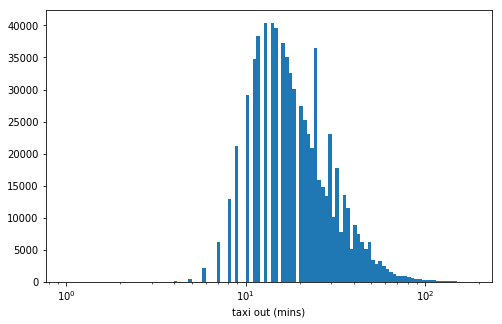

In [171]:
#plotting taxi_out on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(0, np.log10(df_master_unique['taxi_out'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'taxi_out', bins = bins)
plt.xscale('log')
plt.xlabel('taxi out (mins)')
plt.show()

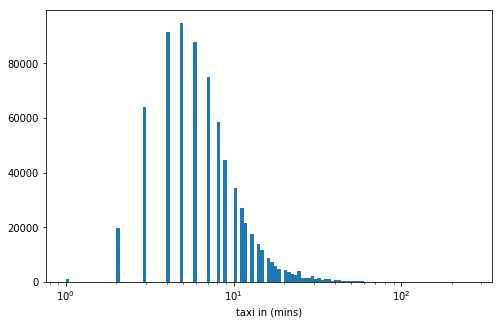

In [172]:
#plotting taxi in on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(0, np.log10(df_master_unique['taxi_in'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'taxi_in', bins = bins)
plt.xscale('log')
plt.xlabel('taxi in (mins)')
plt.show()

Finally, look at the flight times and flight delays in minutes:

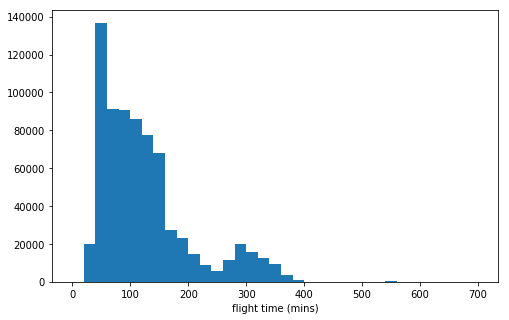

In [173]:
#histogram to plot flight times

binsize = 20
bins = np.arange(0, df_master_unique['air_time'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master_unique, x = 'air_time', bins = bins)
plt.xlabel('flight time (mins)')
plt.show();

The distribution of flight time is bimodal, showing there are two sets of peaks in the dataset for flight time. However, the largest peak is at around 50 mins, indicating most domestic flights in and out of NY were roughly one hour long.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The taxi_in and taxi_out times showed a right-skewed distribution when plotted on absolute values, with most taxi-out times within 25 mins and most taxi-in times within 10 mins. Plotting these distributions on a log scale showed a unimodal distribution of data for taxi-in. However the taxi-out plot did show a single peak at around 25 minutes, indicating a large presence of flights with taxi time of around this long.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> One of the standout features was the high range in taxi times, both in and out. However on further investigation of randomly sampled data, it was not possible to determine that these were incorrectly recorded data points as they exhibited nas_delay reasons which may account for the time taken. For a fuller investigation these points have been left in. 

> Not all flights contained information on the types of delays they encountered, as a result many flights were left with null valued delay types. The delay type data had to be inpivoted previously for the sake of keeping the data tidy, but this resulted in duplicated flights where certain journeys encountered more than one delay type. When analysing the flight count by airline/airport, the duplicate journeys were filtered out to get an accurate representation of the data.

> Taxi times also contained null values for some flights. This could be down to flight cancellations. Therefore they were filtered out of the dataset before taxi times were analysed.

> Flights with delay times (mins) greater than 24 hours were also filtered out of the dataset to keep the data consistent with delays no more than one day, which generally should mean a flight would depart with the same aircraft and the same flight crew, minimising other outcomes such as passengers being placed on alternative flights, in order to look at this dataset from the perspective of the passenger.

> It was interesting to note that from the airports, LGA had the most domestic air traffic in 2018, rather than JFK. This could be interesting to look at further.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's begin by comparing the each field of data in pair-wise correlations:

In [174]:
df_master_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724844 entries, 0 to 754988
Data columns (total 24 columns):
actual_elapsed_time    724844 non-null float64
air_time               724844 non-null float64
arr_del15              724844 non-null float64
arr_delay              724844 non-null float64
arr_period             724844 non-null object
arr_time               724844 non-null float64
cancelled              724844 non-null int64
day_of_month           724844 non-null int64
day_of_week            724844 non-null category
delay_type             159169 non-null object
delay_type_mins        159169 non-null float64
dep_del15              724844 non-null float64
dep_delay              724844 non-null float64
dep_period             724844 non-null object
dep_time               724844 non-null float64
dest                   724844 non-null object
distance               724844 non-null int64
diverted               724844 non-null int64
fl_date                724844 non-null datetime64[ns]


In [207]:
numeric_vars = ['air_time','arr_delay','dep_delay','taxi_in','taxi_out','distance']
category_vars = ['day_of_week','month','arr_period','dep_period','op_unique_carrier','delay_type','origin','dep_period']

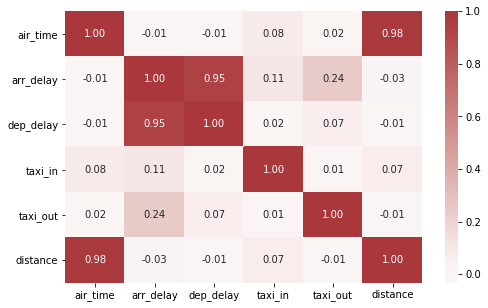

In [199]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_master_unique[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag', center = 0)
plt.show();

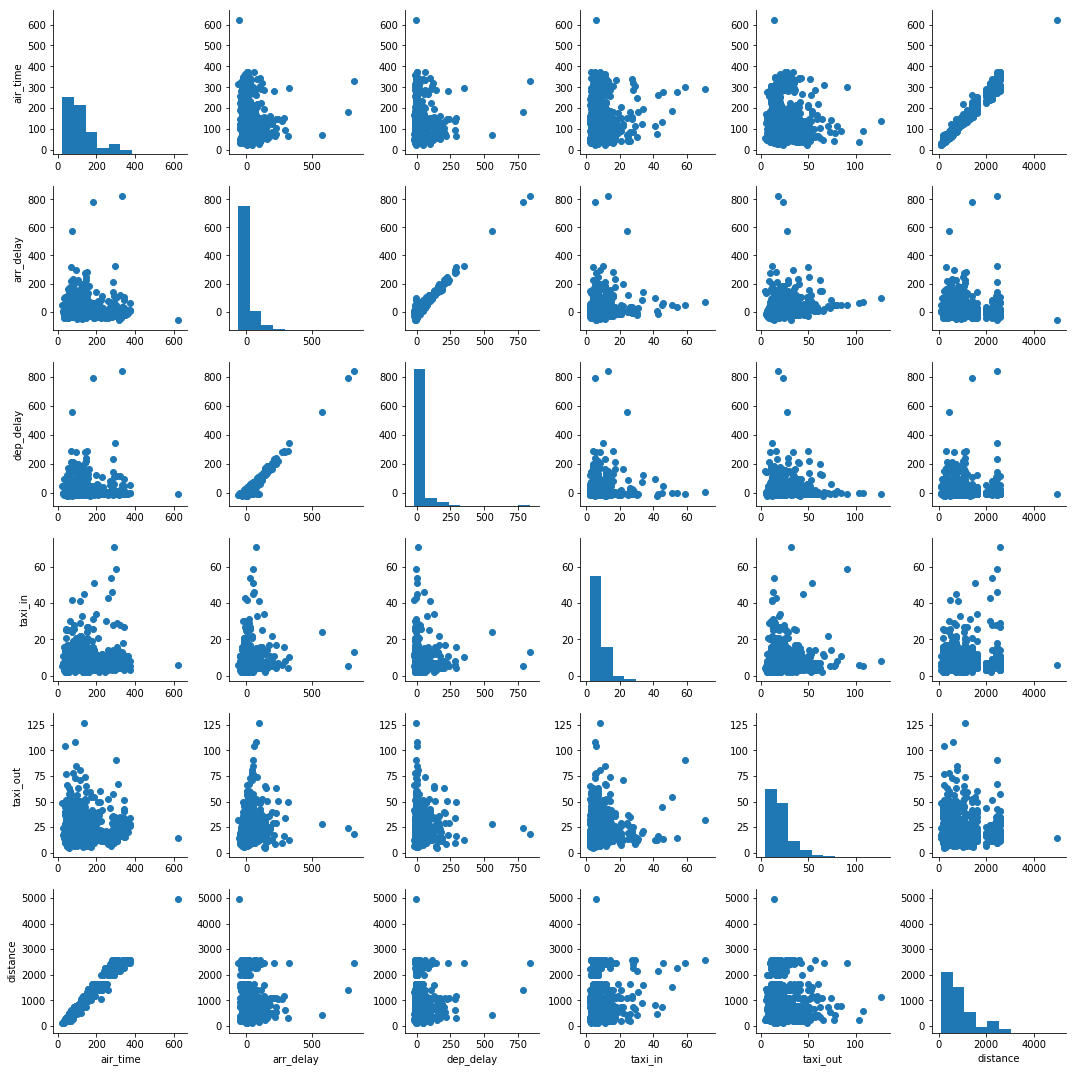

In [202]:
# plot matrix: sampling 1000 flights
sample = df_master_unique.sample(1000)

g = sb.PairGrid(data = sample, vars = numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Interestingly, there seems to be very little correlation between taxi times and any of the numeric variables in the PairGrid plot above. This is further confirmed by the heatmap showing the correlations of each numeric variable. The main correlations lie in the distance and air time, and departure delay and arrival delay. These would make sense as a flight travelling further should be airborn longer, and flights affected by a departure delay will most likely be delayed on arrival too.<br>
<br>
The plots above do not account for the delay reasons.

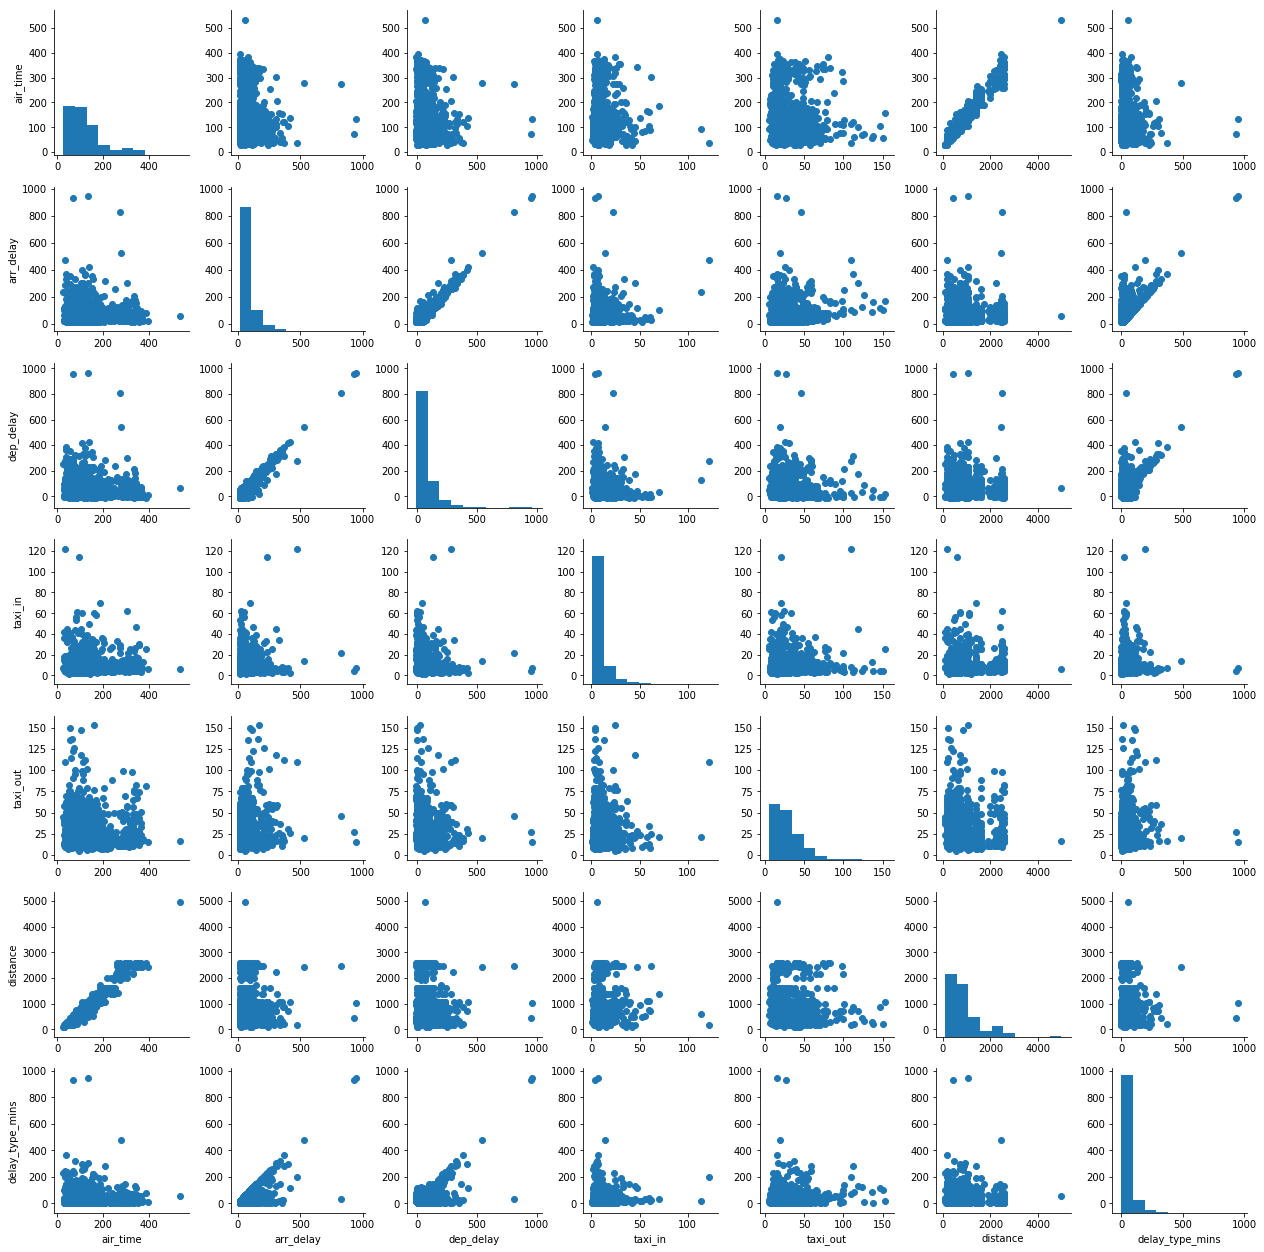

In [205]:
#looking at the delay type mins as a factor
#filter the dataset for null values in delay type mins

sample1 = df_master[df_master['delay_type'].notnull()].sample(1000)

#set new numeric variables
numeric_vars1 = ['air_time','arr_delay','dep_delay','taxi_in','taxi_out','distance','delay_type_mins']

#plot marix for this data

g = sb.PairGrid(data = sample1, vars = numeric_vars1)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

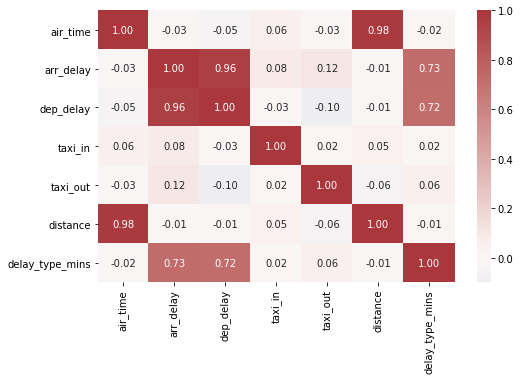

In [206]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(delay_reasons[numeric_vars1].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag', center = 0)
plt.show();

Looking at the PairGrid plot and heatmap for the multiple variables including the delay type mins, it is still easy to see there is no strong correlation with other numeric variables, except for the arrival and departure delays. This could be explained by various types of delay categories being a factor in creating a delay in the flight's departure and subsequent arrival into its destination.

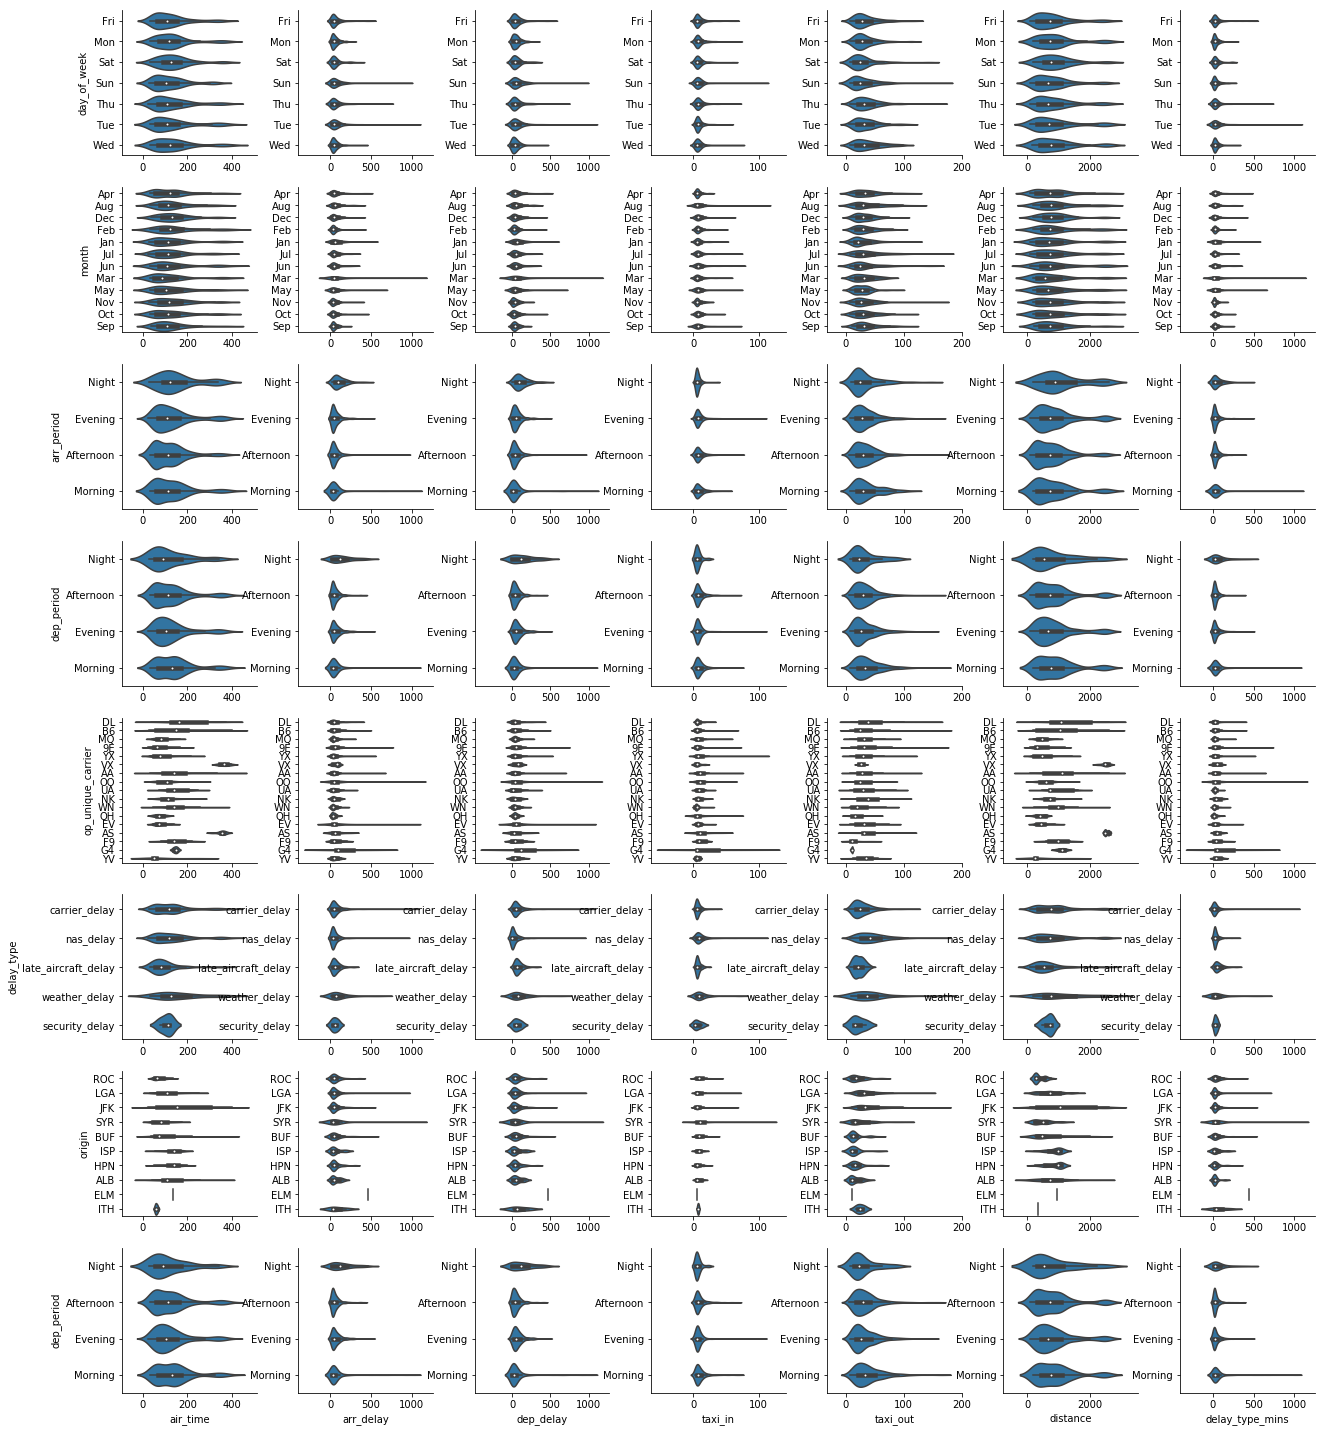

In [208]:
#looking at the relationship between categories and delays and taxi times

sample2 = ny_dep[ny_dep['delay_type'].notnull()].sample(1000)

g = sb.PairGrid(data = sample2, x_vars=numeric_vars1, y_vars=category_vars)
g.map(sb.violinplot);

Looking at the categorical data versus numeric data, there are some conclusions that can be made. Mornings have longer median taxi_out times but more flights have longer taxi_outs at night than they do during the morning. In addition, the dep_delay also seems to have more flights with longer delays at night, with the median dep_delay highest at night. However the morning experienced a few very long delays, indicated by the long stem of the violin.<br>
<br>
While the median delay time seems to be fairly consistent across each day of the week, it seems Sundays and Tuesdays had some rather longer delays in 2018. Sundays also saw some very long taxi_out times, but overall it had a much lower median taxi_out time than the other days.<br>
<br>
Most late aircraft and security delays don't result in long taxi out times, but nas delays and weather delays saw more flights taking longer to taxi to the runway.<br>
<br>
Security delays did not really cause any long delays last year, the same with late aircraft delays, but weather delays saw more significant numbers of departure delays along a wider time range. Nas delays were displayed the lowest median departure delay. <br>
<br>
Overall it seems like categorical data could lead to more conclusions on possible factors behind taxi times and delays.

In [209]:
'''focus on plotting carriers versus taxi times, departure delays, then with months, then with airports, then with
delay types'''

'''use boxplot, violin plot, clustered bar charts, faceting (optional)'''

'focus on plotting carriers versus taxi times, departure delays, then with months, then with airports, then with\ndelay types'

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!